# Jupyter Project - Timmi Jørgensen

### Set path:

In [1]:
path = "/home/timmi/Dokumenter/jupyter/jupyter-course-master/project/"

In [2]:
from IPython.display import IFrame
from IPython.display import YouTubeVideo
from ipywidgets import interact, interactive, fixed

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from numpy import loadtxt #Reads txt files
import math
from pylab import *
from numpy import savetxt #Saves txt files
from scipy import stats
#matplotlib.rcParams['font.size'] = 20

matplotlib.rc('font', family = 'serif')
matplotlib.rc('text', usetex=True)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
matplotlib.rcParams.update({'font.size': 22})

## Introduction
In this project we are going to focus on simulation data from an upcomming paper to be submitted in early 2019. In the paper we investigate the possibility that the Sun was born in the open old stellar cluster M67. The links between the Sun and M67 are numerous. M67’s estimated age of 3.5 - 4.8 Gyr is comparable to the age of the Sun, together with the cluster having a solar-similar chemical composition with \[Fe/H\] = 0.00 ± 0.06. A dominant fraction of stars analysed in M67 by Öne-hag et al. (2014) have also shown abundance patterns that are in better agreement with the Sun than solar twins in the Solar neighbourhood. 

We are investigating the orbit of stellar cluster escapers and the possibility that the Sun has been born in M67 by using a Milky Way model and Nbody simulations of M67. In our investigation we assume that the Sun was tidally stripped away from M67 by interactions with the spiral arms and GMCs (Giant Molecular Clouds) of the Milky Way as the cluster departed from its birth place in the Galactic Plane onto a height of z ∼ 400 - 450 pc. 

In this project we will focus one of these simulations where we investigate the internal evolution of a cluster and the evolution of the orbits of its escaping stars.

### Milky Way model
Below we see the Milky Way model in which the stellar cluster M67 is orbiting. The model consists of a gas disk, a thin stellar disk, a thick stellar disk, a galactic bar, two spiral arms and GMCs. Fig. 1 below shows the density profile of the Milky Way model. The black dots represent the GMCs and the yellow star represents the current position of the Sun.

<img src="fig/MW_profile.png" width="500" align="left"/>

### Fig. 1
Surface density profile of the Milky Way model at present time. The black dots represents the GMCs currently located in the model while the yellow star represents the location of the Sun. The spiral arms and galactic bar rotate with a constant pattern speed of 24 and 55 km s$^{-1}$ kpc$^{-1}$, respectively. They remain present at all times throughout the simulations while the GMCs are transient with a lifetime of 40 Myr.

### N-body simulation
The number of stars in the initial cluster are 36000 corresponding to a mass of about $2.2 \times 10^4$ $M_{\odot}$.  The stars are distributed in mass to an IMF (Initial Mass Function) described by Kroupa et al. (2001) in a range of 0.1 - 50 $M_{\odot}$. The stars were spatial distributed according to a Plummer (1911) distribution with stellar evolution turned on with a metallicity similar to the Sun of Z = 0.02. The cluster starts off with a half-mass radius $r_h$ of 4 pc which will change as the cluster evolves.

## N-body data
We start by reading in the initial values of the 36000 stars in the cluster and plot the IMF defined between 0.1 and 50 $M_{\odot}$. When a new generation of stars are born and form a stellar cluster the most common type of stars are the low mass ones which we also see in the histogram in Fig. 2.

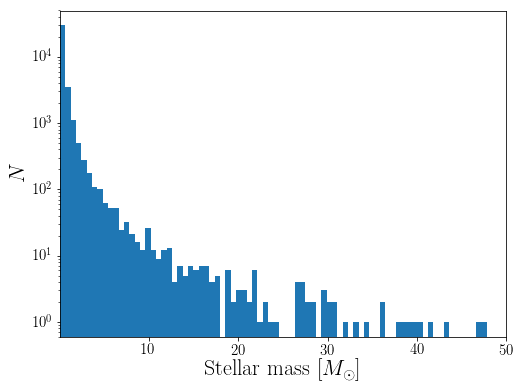

In [3]:
name_arr = ["x","y","z", "M0", "TIME"] #column names
idata = pd.read_table(path+"A/A_stars.txt", delim_whitespace = True, header=None,nrows=36000, names = name_arr)
plt.rcParams.update({'font.size': 22})
fig = plt.figure(1, (8,6))
fig.patch.set_facecolor("white")
plt.hist(idata["M0"], bins = 80)
plt.yscale("log")
plt.xlim([0.1,50.0])
plt.xlabel("Stellar mass $[M_{\odot}]$")
plt.ylabel("$N$");

### Fig. 2
Initial mass function of cluster stars in the mass range from 0.1 to 50.0 $M_{\odot}$.

## Stellar cluster dynamics
Stellar clusters can lose stars in various ways. It can either be due to the internal dynamics where two or more stars encounter each other, causing one of the stars to escape the cluster. In these situations it is usually the least massive star which gets ejected, whereas the more massive ones will sink into the center of the cluster where the gravitational potential is deepest. If the cluster evolution is dominated by its internal dynamics, we usually find the most massive stars to be located in the core of the cluster while less massive ones resides in the cluster envelope. Because of this, the least massive stars will also be the first ones to be tidally stripped away from the cluster, which means that we expect the cluster to be more and more dominated by the higher mass stars. 

In this simulation, however, the cluster also encounters five GMCs which will tidally strip the cluster of stars affecting the number of escaping stars compared to what we see if the cluster is in a weak galactic gravitaional field. From the N-body simulation we read the cluster parameters: 

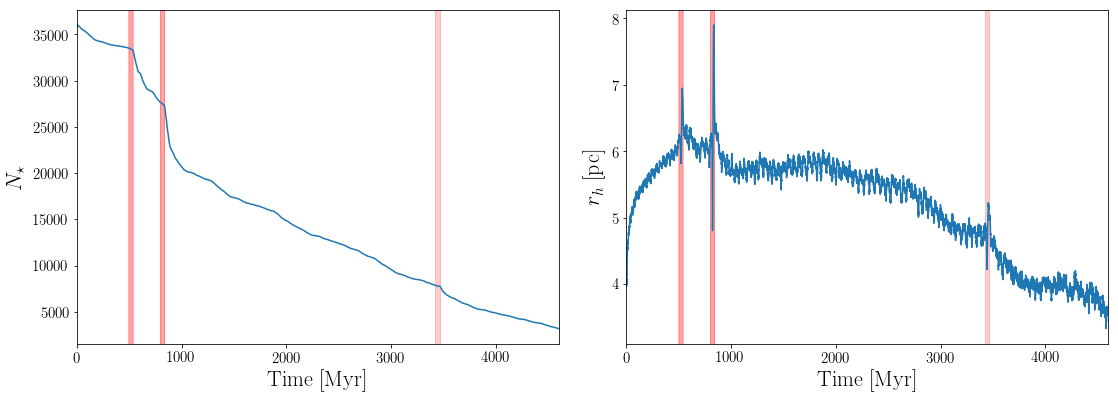

In [4]:
fort200 = np.loadtxt(path+"A/fort.200") #[ time, mass, half-mass radius, number of stars]
GMC = np.loadtxt(path+"A/GMC_times") # [birth time, encounter time, mass]
t_birth = GMC[:,0]

fig = plt.figure(2, (16,6))
fig.patch.set_facecolor("white")
ax1 = plt.subplot(121)
plt.plot(fort200[:,0], fort200[:,3])    
for j in range(0,len(t_birth)):
    plt.axvspan(t_birth[j], t_birth[j]+40, 0,1, alpha = 0.2, color = "red")
plt.xlabel("$\mathrm{Time}$ $[\mathrm{Myr}]$")
plt.ylabel("$N_{\star}$")
plt.xlim([0,4600]) 
ax2 = plt.subplot(122)
plt.plot(fort200[:,0], fort200[:,2])    
for j in range(0,len(t_birth)):
    plt.axvspan(t_birth[j], t_birth[j]+40, 0,1, alpha = 0.2, color = "red")
plt.xlabel("$\mathrm{Time}$ $[\mathrm{Myr}]$")
plt.ylabel("$r_h$ $[\mathrm{pc}]$")
plt.xlim([0,4600.0])
fig.tight_layout()


### Fig. 3
**Left:** Evolution of the number of stars for the cluster. The shaded regions represents the GMC encounters for the cluster and are marking the lifespan of each GMC. The first two shaded regions at t ∼ 520 and t ∼ 820 Myr are actually four GMC encounters and thus why these shadings appear more pronounced than the last encounter. **Right:** Evolution of the half-mass radius for the cluster.

These two plots in Fig. 3 show how the half-mass radius and the number of stars in the cluster evolve. The red shaded vertical stripes indicate at which point in time the GMC encounters occur and span the life time of each GMC. The first two encounters are only seperated in time by 2 Myr with encounter times of 518.8 and 520.8 Myr. Similarly, the two next encounters also happen in pair with only 0.9 Myr between them at times of 819.8 and 820.7 Myr. These four GMC encounters cause the cluster to lose a significant number of stars. Roughly 40 % of the stars are lost within the first 1 Gyr. For each encounter we see that the half-mass radius of the cluster expands before it settles down as stars are lost from the cluster. Between GMC encounters, e.g. in the range of t = \[1000; 3300\] Myr, we see a constant loss of stars that is a consequence of the internal dynamics of the cluster and the external galactic tidal field.

We can calculate the rate of stellar loss between the GMC encounters.

In [5]:
s1000 = np.where(abs(fort200[:,0]-1000) == min(abs(fort200[:,0]-1000)))[0][0]
s3300 = np.where(abs(fort200[:,0]-3300) == min(abs(fort200[:,0]-3300)))[0][0]
rate = (fort200[s1000,3] - fort200[s3300,3])/(fort200[s3300,0] - fort200[s1000,0])

In [6]:
print("The rate is %4.1f stars pr Myr" % rate)

The rate is  5.3 stars pr Myr


We can compare this rate to the stars that escape as a consequence of the five GMC encounters. Each GMC has a life time of 40 Myr in the Milky Way model. We define the escaping stars of the cluster from the birth of each of the five GMCs and 60 Myr later to be stars that have escaped due to the GMC encounter.

In [7]:
#Read escape file
ESC = loadtxt(path+"A/ESC") 
TESC = ESC[:,0] #[Time of escape]
t_start = []
t_end = []
# Take into account if there is a seperation less than 60 Myr between different GMC encounters
t_enc = GMC[:,1]
tt_enc = [] 
if (len(t_birth) > 1): #check if there are no encounters
    t_birth = np.sort(t_birth)    
    dt_enc = np.zeros(len(t_birth))
    dt_enc[0] = 1000.0
    for i in range(1,len(t_birth)):
        dt = t_birth[i] - t_birth[i-1]
        dt_enc[i] = dt
    
    dt_tjek = np.zeros(len(dt_enc))
    for i in range(0,len(dt_enc)-1):
        dt_tjek[i] = dt_enc[i+1]
    
    dt_tjek[-1] = 1000.0    
else:
    dt_enc = np.zeros(1)
    dt_enc[0] = 1000.0
    dt_tjek = np.zeros(1)
    dt_tjek[0] = 40.0

tt_dt = []                
for i in range(0,len(dt_enc)):
    if (dt_enc[i] > 50.0):
        tt_enc.append(t_birth[i])
        if (dt_tjek[i] > 50.0):
            tt_dt.append(60.0)
        elif(dt_tjek[i] < 50.0):
            tt_dt.append(dt_tjek[i] + 60.0)

Tc = []      
idd = []
for i in range(0,len(TESC)):
    for j in range(0,len(tt_enc)):
        if (TESC[i] > tt_enc[j] and TESC[i] < (tt_enc[j] + tt_dt[j])):
            Tc.append(TESC[i])
            idd.append(i)
                
print(len(Tc), "escapers")  

3818 escapers


The number of stars that escape the cluster instantaneous at the time of the encounters or 20 Myr after is 3818. However, we do see in the previous plot that the stellar loss rate of the cluster is much higher than 5 stars pr Myr, indicating that the effect of the encounters also heat the cluster in a way that causes stars to escape over a longer period in time as a consequence of this. We now look at what speed the stars escape with and see if there is a difference in terms of stellar escapers that are ejected as a direct consequence of a GMC encounter and the ones that escape at different times.

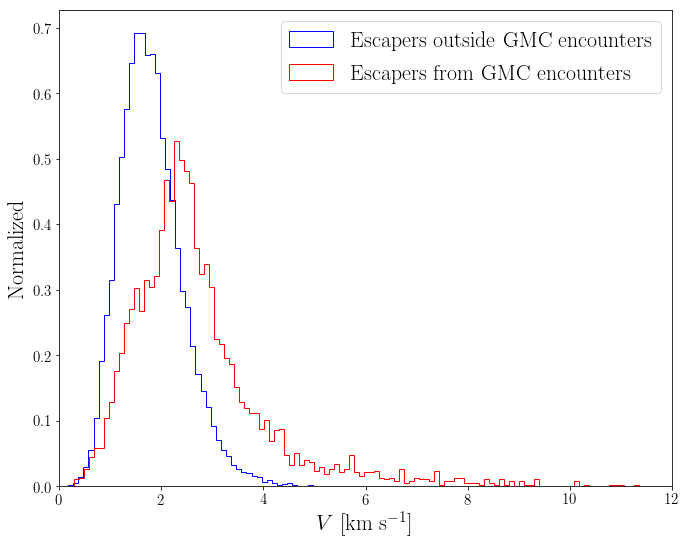

In [8]:
i_no = [] # index for stars that are not due to direct GMC encounters
idd = np.array(idd)
for i in range(0,len(TESC)):
    s = np.where(idd == i)[0]
    if (len(s) < 1):
        i_no.append(i)
i_no = np.array(i_no)    


fig = plt.figure(3, (10,8))
fig.patch.set_facecolor("white")
plt.hist(ESC[i_no,4], bins = int(max(ESC[i_no,4])/0.1), histtype = "step", color = "blue", density = True, \
         label = "Escapers outside GMC encounters") 
plt.hist(ESC[idd,4], bins = int(max(ESC[idd,4])/0.1), histtype = "step", color = "red", density = True,   \
         label = "Escapers from GMC encounters")
plt.xlabel("$V$ $[\mathrm{km}$ $\mathrm{s}^{-1}]$")
plt.ylabel("$\mathrm{Normalized}$")
plt.xlim([0,12]) 
plt.legend()
fig.tight_layout()

### Fig. 4
The distribution functions of the escape speed for stars the escape due to direct GMC encounters and starts that are lost due to the galaltic field. 

In [9]:
print("mean for escapers outside of GMC encounters = %4.2f +/- %4.2f" %(np.mean(ESC[i_no,4]),np.std(ESC[i_no,4])))
print("mean for escapers from GMC encounters = %4.2f +/- %4.2f" %(np.mean(ESC[idd,4]),np.std(ESC[idd,4])))

mean for escapers outside of GMC encounters = 1.92 +/- 1.50
mean for escapers from GMC encounters = 2.69 +/- 1.37


From Fig. 4 we see that there is a difference between the two distributions. However, the mean value of the two distributions shows us that they are within one standard deviation of each other. We see that stellar escapers lost due to the galactic tidal field do not experience the higher speed that some of the stellar escapers lost due to GMC encounters. This corresponds well to the fact that stripping by the galactic tidal field will be much less violent than a GMC encounter.

## Cluster structure visualization
We now want to focus on the visualization of the stellar cluster over its evolution of 4.6 Gyr. We want to do this by making an interactive plot where the cluster is shown in the $x-y$ plane. There will be 3 drop down boxes where the time, the minimum mass and minimum distance from the cluster centre can be chosen.

In [10]:
data = pd.read_table(path+"A/A_stars.txt", delim_whitespace = True, header=None, names = name_arr)

In [11]:
time = data["TIME"].unique()
data

,x,y,z,M0,TIME
0,1.392700,-0.302070,-0.84299,47.79200,0.0
1,-0.493780,-2.887000,2.46660,46.66200,0.0
2,2.119100,-0.857330,-3.82560,43.54900,0.0
3,-2.170400,-8.069700,-2.39320,41.76500,0.0
4,0.180000,0.283820,-2.35520,40.36700,0.0
5,0.635440,3.785100,-0.71841,39.62800,0.0
6,1.799400,-0.482070,1.78510,39.40600,0.0
7,-0.915680,16.479000,-1.28720,38.64800,0.0
8,-12.988000,10.599000,11.30500,38.14100,0.0
9,-1.103500,-2.806100,0.39425,35.99900,0.0


In [12]:
def xy_cluster(t, r_lim, m_lim):
    D0 = data.loc[data['TIME'] == t]
    x = D0["x"].values
    y = D0["y"].values
    z = D0["z"].values
    M = D0["M0"].values
    #r_lim = 40.0
    r = np.sqrt(x**2 + y**2 + z**2)
    rsub = np.where(r <= r_lim)[0]
    x = x[rsub]
    y = y[rsub]
    Mt = M[rsub]
    msub = np.where(Mt >= m_lim)[0]

    fig = plt.figure(4, (6,6))
    fig.patch.set_facecolor("white")
    ax = plt.axes()
    if (len(msub) < 30):
        ax.plot(x[msub], y[msub], ".")
    else:
        ax.plot(x[msub], y[msub], ",")
    plt.xlim([-r_lim,r_lim])
    plt.xlabel("$x$ $[\mathrm{pc}]$")
    plt.ylabel("$y$ $[\mathrm{pc}]$")
    plt.ylim([-r_lim,r_lim])
    ax.set_aspect('equal', 'box')

r_val = [40.0, 30.0, 20.0, 10.0 , 5.0, 4.0, 3.0, 2.0, 1.0, 0.5]
m_val = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,0.8,0.9,1.0, 2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0]
interact(xy_cluster, t = time, r_lim = r_val, m_lim = m_val);

interactive(children=(Dropdown(description='t', options=(0.0, 459.9, 919.79, 1379.7, 1839.6, 2299.5, 2759.4, 3…

### Fig. 5
Visualization of the cluster in the $x-y$ plane. By changing the time it is clear to see how the cluster loses stars and becomes less dense while the higher mass stars that are still in the cluster are located close to the centre.  

## Escaper orbits from Milky Way model
After the N-body simulation was done, the cluster was placed in the Milky Way model. As it orbits the Milky Way and interacts with the spiral arms and GMCs the cluster will lose its stars accoding to the previous N-body simulation. The orbits are followed from the birth of the cluster to an age of 4.6 Gyr, i.e. the solar age. The orbits of the escapers are described by two parameters, the eccentricity $e$ and the maximum height above the galactic plane $|z|_{\mathrm{max}}$ during a full orbit. Stars that have similar or lower values of $e$ and $|z|_{\mathrm{max}}$ compared to the Solar values at the end of the simulation at 4.6 Gyr will be classified as solar-like orbits.

The data used here are stored in 6 different directories. 

In [13]:
from matplotlib.colors import LogNorm
e_solar = 0.1 #solar value
z_solar = 107.0 #solar value
e_names = ["ID","rmax", "tmax", "rmin", "tmin", "time", "e", "Rg1", "Rg2", "Rg_avg"]
z_names = ["ID", "time", "zmax", "Rg"]
#Read data
edata = pd.read_table(path+"escapers/1/e_matrix", delim_whitespace = True, header=None, usecols= [0,6], \
                      names = e_names)
zdata = pd.read_table(path+"escapers/1/z_max", delim_whitespace = True, header=None, usecols= [0,1,2], \
                      names = z_names)
#Read final ematrix and zmax
e_final = pd.read_table(path+"/escapers/ecc_final",delim_whitespace = True, header=None, usecols= [0,6], \
                      names = e_names)
z_final = pd.read_table(path+"/escapers/zmax_final", delim_whitespace = True, header=None, usecols= [0,1,2], \
                      names = z_names)

#Loop over the 6 directories.
for i in range(1,6):
    ep = pd.read_table(path+"escapers/"+str(i+1)+"/e_matrix", delim_whitespace = True, header=None, usecols= [0,6], \
                       names = e_names)
    zp = pd.read_table(path+"escapers/"+str(i+1)+"/z_max", delim_whitespace = True, header=None, usecols= [0,1,2], \
                       names = z_names)
    edata = pd.concat([edata,ep]) #merge dataframes
    zdata = pd.concat([zdata,zp]) #merge dataframes

zdata["e"] = edata["e"]#merge the two dataframes
z_final["e"] = e_final["e"] 

zdata["zmax"] *= 1e3 # Convert from kpc to pc
z_final["zmax"] *= 1e3 # Convert from kpc to pc

#the cluster with ID = 0 is present in all 6 directories which we remove
z_final = z_final.loc[z_final["ID"] != 0]
zc = zdata.loc[zdata["ID"] == 0]
zc = zc.drop_duplicates() # save cluster info
zdata = zdata.drop_duplicates(keep = False)
#Read in escape times and IDs from Milky Way model.
T_ESC = loadtxt(path+"/escapers/T_ESCAPE.txt")[1:]
ID_ESC = loadtxt(path+"/escapers/ID_ESCAPE.txt")[1:]
#locate escaping stars due to GMC encounters:
def escaper_plot(kk):
    fig = plt.figure(6, (16,6))
    fig.patch.set_facecolor("white")
    #find stars that escape due to GMC encounter
    s = np.where(T_ESC >= tt_enc[kk])[0]
    Ts = T_ESC[s]
    IDs = ID_ESC[s]
    s1 = np.where(Ts <= (tt_enc[kk] + tt_dt[kk]))[0]
    IDs = IDs[s1]
    #locate relevant IDs
    ztemp = zdata[zdata["ID"].isin(IDs)]
    #only take first unique value (data set is increasing with time)
    zt = ztemp.drop_duplicates(subset = "ID")
    #get values
    zz = zt["zmax"].values
    ee = zt["e"].values
    iddz = zt["ID"].values
    ax1 = plt.subplot(1,2,1)
    f2 = plt.hist2d(ee, zz, bins=100,range=[[0.0,0.35],[0.0,800.0]], norm = LogNorm(), cmin = 0, cmax = 1e3, vmin = 1, vmax = 230)
    plt.plot([e_solar, e_solar], [0, z_solar], color = "red")
    plt.plot([0, e_solar], [z_solar, z_solar], color = "red")    
    plt.xlabel("$e$")
    plt.ylabel("$|z|_{\mathrm{max}}$ $[\mathrm{pc}]$")
    plt.xlim([0.0,0.30])
    plt.ylim([0.0,800.0])
    cb = plt.colorbar(ticks = [1,2,3,4,5,6,7,8,9,10, 20, 30, 40, 50, 60, 70, 80 ,90, 100, 200],label = "$N_{\star}$")
    cb.ax.tick_params(labelsize=15) 
    plt.annotate("$t= "+str(int(tt_enc[kk]))+"$ $\mathrm{Myr}$", xy=(0.70,0.92),xycoords='axes fraction',fontsize=20)
    fig.tight_layout()

    #find the same ids for the final position of the same stars
    zf = z_final[z_final["ID"].isin(iddz)]
    ztemp = ztemp.drop_duplicates(subset="ID")
    zz = zf["zmax"].values
    ee = zf["e"].values
    ax3 = plt.subplot(1,2,2)
    f3 = plt.hist2d(ee, zz, bins=100,range=[[0.0,0.35],[0.0,800.0]], norm = LogNorm(), cmin = 0, cmax = 1e3, vmin = 1, vmax = 230)
    plt.plot([e_solar, e_solar], [0, z_solar], color = "red")
    plt.plot([0, e_solar], [z_solar, z_solar], color = "red")    
    plt.xlabel("$e$")
    plt.ylabel("$|z|_{\mathrm{max}}$ $[\mathrm{pc}]$")
    plt.xlim([0.0,0.30])
    plt.ylim([0.0,800.0])
    cb = plt.colorbar(ticks = [1,2,3,4,5,6,7,8,9,10, 20, 30, 40, 50, 60, 70, 80 ,90, 100, 200],label = "$N_{\star}$")
    cb.ax.tick_params(labelsize=15) 
    plt.annotate("$t= "+"4600"+"$ $\mathrm{Myr}$", xy=(0.70,0.92),xycoords='axes fraction',fontsize=20)
    fig.tight_layout()

interact(escaper_plot, kk = [0,1,2]);    

interactive(children=(Dropdown(description='kk', options=(0, 1, 2), value=0), Output()), _dom_classes=('widget…

### Fig. 6
These plots show the orbits of escaped stars due to GMC encounters at different times for the cluster in the $e-|z|_{\mathrm{max}}$ plane. **Left:** The stars are shown after one full orbit around the Milky Way. **Right:** The final positions of the same stars at the end of the Milky Way simulation. The red retangle marks
the region where the stars are defined to be solar-like.

Because stars escape from the cluster at very different times their orbits evolve after they are lost from the cluster. The left panels of Fig. 6 show the stars that escape as a consequence of aGMC encounter for cluster at three different encounter times. The right of Fig. 6 shows the orbits of the same stars, but at the end of the simulation. From the left panels we see how $|z|_{\mathrm{max}}$ of the escapers are dependent on when the stars escape. This is a consequence of the orbital heating the cluster undergoes as its orbit evolves in the Galactic enviroment and is scattered to higher |z|.
The initial orbit of an escaped star is therefore very dependent on what kind of orbit the cluster is on.

In [14]:
#final position of stellar escapers after 4.6 Gyr based on when they escaped
from ipywidgets import interact, interactive, fixed
def plot_final(ts = 2000.0):
    s0 = np.where(T_ESC > ts)
    ID0 = ID_ESC[s0]
    #locate relevant IDs
    ztemp0 = z_final[z_final["ID"].isin(ID0)]
    
    z0 = ztemp0["zmax"].values
    e0 = ztemp0["e"].values
    fig = plt.figure(8, (9,6))
    f3 = plt.hist2d(e0, z0, bins=100,range=[[0.0,0.35],[0.0,800.0]], norm = LogNorm(), cmin = 0, cmax = 1e3, vmin = 1, vmax = 230)
    plt.plot([e_solar, e_solar], [0, z_solar], color = "red")
    plt.plot([0, e_solar], [z_solar, z_solar], color = "red")    
    plt.xlabel("$e$")
    plt.ylabel("$|z|_{\mathrm{max}}$ $[\mathrm{pc}]$")
    plt.xlim([0.0,0.30])
    plt.ylim([0.0,800.0])
    cb = plt.colorbar(ticks = [1,2,3,4,5,6,7,8,9,10, 20, 30, 40, 50, 60, 70, 80 ,90, 100, 200],label = "$N_{\star}$")
    cb.ax.tick_params(labelsize=15) 
    plt.annotate("$t_{\mathrm{esc}} > "+str(ts)+"$ $\mathrm{Myr}$", xy=(0.60,0.92),xycoords='axes fraction',fontsize=20)
    fig.tight_layout()
    

interactive_plot = interactive(plot_final, ts = (200.0, 4600.0, 100.0))
interactive_plot.children[0].description=r'$t_{\mathrm{esc}}$' # slider
interactive_plot



interactive(children=(FloatSlider(value=2000.0, description='$t_{\\mathrm{esc}}$', max=4600.0, min=200.0, step…

### Fig. 7
The final orbits of escaped stars from the cluster in the $e-|z|_{\mathrm{max}}$ plane after 4600 Myr. The red retangle marks the region where the stars are defined to be solar-like. The slider controls the stars that have escaped at $t_{\mathrm{esc}}$ or later. By changing the slider we see that stars that escape the cluster late will never end up on solar-like orbits. This is due to the fact that at this point in time the cluster has been heated by the spiral arms and GMCs in the Milky Way.  

In [15]:
#stars that are on solar-like orbits at the end of the simulation.
df_solar = z_final.loc[z_final["e"] <= e_solar]
df_solar = df_solar.loc[df_solar["zmax"] <= z_solar]
fraction = df_solar.shape[0]/len(T_ESC)*100.0
print("fraction of stars that end up on solar-like orbits:", "%4.2f" %fraction, "%")

fraction of stars that end up on solar-like orbits: 1.59 %


We see that it is only a small fraction of stars that end up on solar-like orbits. However, it is possible for the Sun to have escaped from M67 when the cluster was on a cold disk-like orbit before the cluster got scattered up to high $z$.

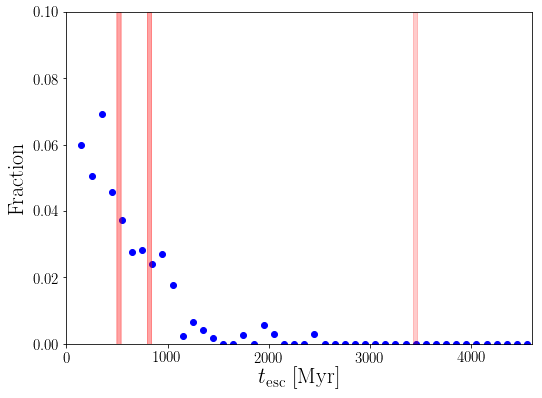

In [16]:
Ft = [] #time
F = [] #fraction
dt0 = 100.0
for i in range(0,46):
    id_enc0 = []
    n0 = 0.0
    for j in range(0,len(T_ESC)):
        #if (T_ESC[j] > i*dt0 and T_ESC[j] < dt0)
        if ((T_ESC[j] > (i*dt0)) and (T_ESC[j] < (dt0*(i+1)))):
            id_enc0.append(ID_ESC[j])
            n0 = n0 + 1.0
           # print(j)
    ztemp0 = z_final[z_final["ID"].isin(id_enc0)]
    
    df_solar0 = df_solar[df_solar["ID"].isin(id_enc0)]

    F.append(double(df_solar0.shape[0])/double(ztemp0.shape[0]))
    Ft.append((2*i+1)*dt0/2.0)

fig = plt.figure(14,(8,6))
fig.patch.set_facecolor("white")
for j in range(0,len(t_birth)):
    plt.axvspan(t_birth[j], t_birth[j]+40, 0,1, alpha = 0.2, color = "red")
plt.scatter(Ft, F, color = "blue")
plt.xlabel("$t_{\mathrm{esc}}$ $[\mathrm{Myr}]$")
plt.ylabel("$\mathrm{Fraction}$")     
plt.xlim([0,4600]) 
plt.ylim([0.0,0.1])
fig.tight_layout()
plt.savefig(path+"fig/fraction_time.png", bbox_inches = 'tight')

### Fig. 8
The fraction of stellar escapers that end up on solar-like orbits within a time bin with size $\Delta t$ = 100 Myr.

From Fig. 8 we see the fraction of stellar escapers that end up on solar-like orbits are much higher in the early stages of the clusters orbit. After 2 Gyr it has dropped to zero and we can therefore conclude that it is important for the cluster to have GMC encounters in the early stages of its life time if its stellar escapers have to end up on solar-like orbits. 